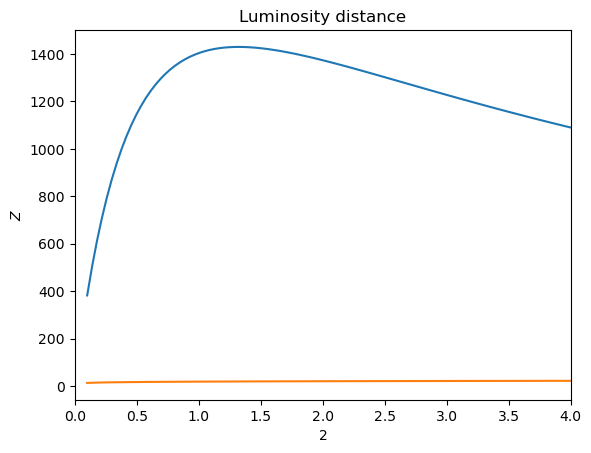

In [7]:
import camb as camb
import matplotlib.pyplot as plt
import numpy as np

pars=camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.22, omch2=0.122)
result=camb.get_background(pars)
z=np.linspace(0.1,4,100)
mu=5*np.log10(result.luminosity_distance(z))
DA= result.angular_diameter_distance(z)
plt.plot(z,DA)
plt.xlabel('$2$')
plt.ylabel('$Z$')
plt.title('Luminosity distance')
plt.xlim([0,4])

plt.plot(z,mu)

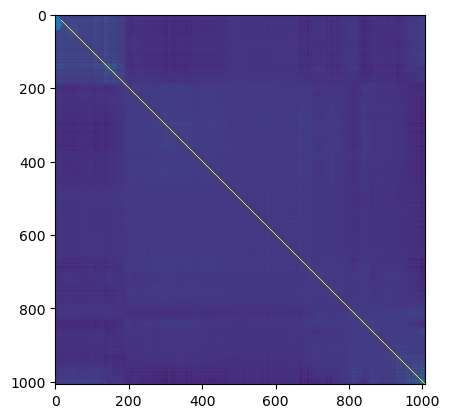

In [17]:
data=np.loadtxt('fit_exercise_data.txt')
plt.plot(data[:,0],data[:,1],'o')
obs_z=data[:,0]
obs_mu=data[:,1]
covariance=np.loadtxt('fit_exercise_covariance.txt')
correlation=np.corrcoef(covariance)
plt.imshow(correlation, interpolation='nearest')

In [18]:
inv_cov=np.linalg.inv(covariance)

In [27]:
def likelihood(omegam):
    pars=camb.CAMBparams()
    H0=70
    h=H0/100
    pars.set_cosmology(H0=H0, ombh2=omegam * h**2 * 0.15, omch2=omegam * h**2 * 0.85)
    result=camb.get_background(pars)
    mu=5.* np.log10(result.luminosity_distance(obs_z))
    #built likelihood
    residuals=mu-obs_mu
    like=-0.5 * np.dot(residuals, np.dot(inv_cov, residuals))
    ones=np.ones_like(residuals)
    temp_1=np.dot(ones, np.dot(inv_cov, residuals))
    temp_2=np.dot(ones, np.dot(inv_cov, ones))
    like += 0.5 * temp_1**2/temp_2
    return like 

In [29]:
omegam_grid=np.linspace(0.1, 0.9, 100)
likelihoods = np.array([likelihood(omegam) for omegam in omegam_grid])
likelihoods = likelihoods-np.max(likelihoods)

Text(0, 0.5, 'Likelihood')

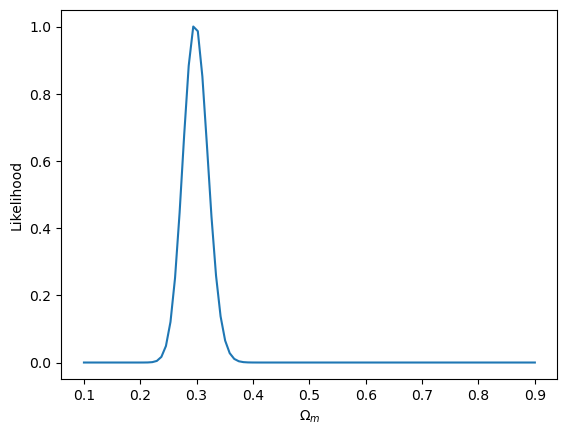

In [30]:
plt.plot(omegam_grid,np.exp(likelihoods))
plt.xlabel(r'$ \Omega_m $')
plt.ylabel('Likelihood')

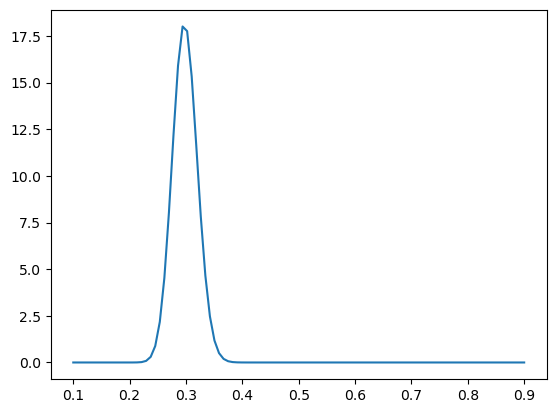

In [32]:
norm=np.trapezoid(np.exp(likelihoods), omegam_grid)
posterior=np.exp(likelihoods)/norm
plt.plot(omegam_grid, posterior)